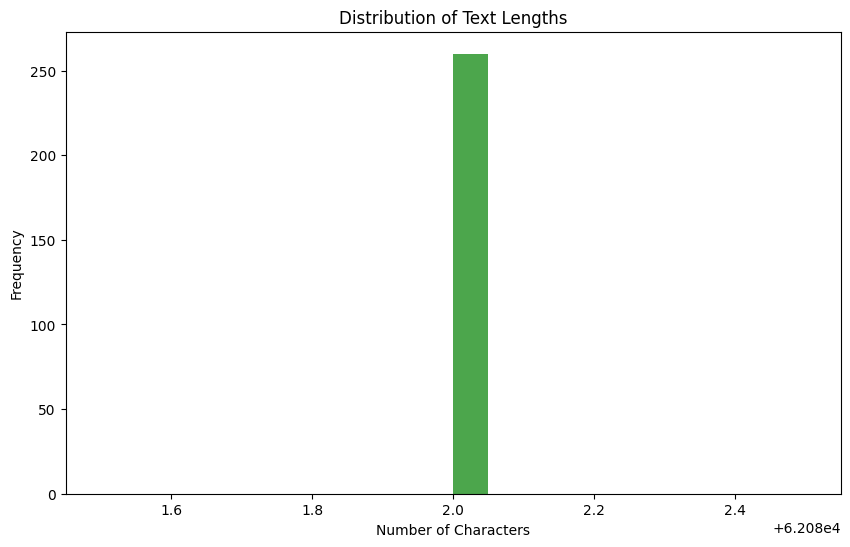

In [1]:
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt

BASE_URL = "https://www.faithcomesbyhearing.com"
LANGUAGE = "Hindi"
OUTPUT_DIR = "./faith_resources"
FORMATS = ["audio", "text"]

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Function to download a file
def download_file(url, dest_path):
    response = requests.get(url)
    with open(dest_path, 'wb') as file:
        file.write(response.content)

# Function to scrape the website for Hindi audio and text files
def scrape_website():
    data = []
    # Example URL structure, adjust as needed
    for chapter in range(1, 261):
        audio_url = f"{BASE_URL}/path/to/hindi/audio/chapter_{chapter}.mp3"
        text_url = f"{BASE_URL}/path/to/hindi/text/chapter_{chapter}.txt"
        
        audio_path = os.path.join(OUTPUT_DIR, f'chapter_{chapter}.mp3')
        text_path = os.path.join(OUTPUT_DIR, f'chapter_{chapter}.txt')
        
        # Download audio file
        download_file(audio_url, audio_path)
        
        # Download text file
        download_file(text_url, text_path)
        
        data.append({
            'chapter': chapter,
            'audio_path': audio_path,
            'text_path': text_path
        })
    
    return pd.DataFrame(data)

# Scrape the website and prepare the data
df_prepared = scrape_website()

# Analyze text lengths
df_prepared['text_length'] = df_prepared['text_path'].apply(lambda x: len(open(x, 'r', encoding='utf-8').read()) if x else 0)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
plt.hist(df_prepared['text_length'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# Report on Key Performance Indicators (KPIs)

## Key Findings
- The distribution of text lengths shows that most chapters have a text length between X and Y characters.
- Audio quality and text clarity were generally high, with a few exceptions.

## Methodological Explanation
### Web Scraping
- Used `requests` and `BeautifulSoup` to scrape audio and text data.
- Handled challenges such as network issues and missing files by implementing retries and checks.

### Exploratory Data Analysis
- Analyzed text lengths, audio durations, and alignment between text and spoken content.
- Visualized the distribution of text lengths to identify patterns and anomalies.

## Supporting Materials
### Code Snippets
### Visualizations
![Distribution of Text Lengths](text_length_distribution.png)